In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [66]:
HR=pd.read_csv('HR-Employee-Attrition.csv')

In [67]:
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [68]:
HR.shape

(1470, 35)

In [69]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [70]:
HR.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [71]:
X=HR.iloc[:,[18,16,28]].values

In [72]:
X

array([[5993,    4,    8],
       [5130,    2,   10],
       [2090,    3,    7],
       ...,
       [6142,    2,    6],
       [5390,    2,   17],
       [4404,    3,    6]])

In [73]:
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

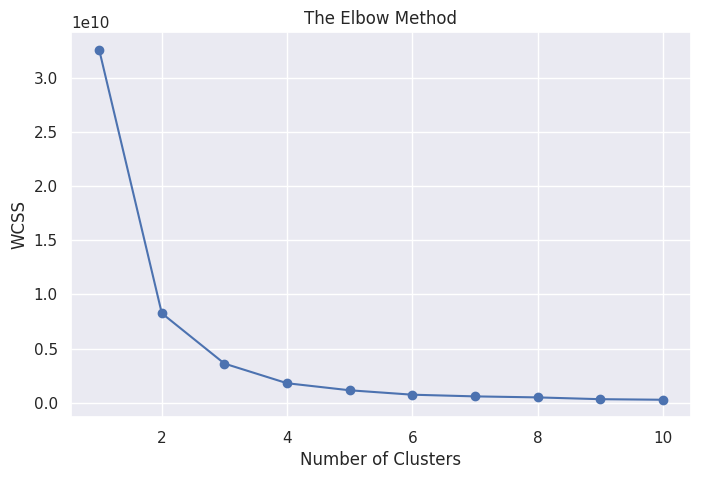

In [74]:
sns.set()
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.grid(True)
plt.show()

In [75]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y = kmeans.fit_predict(X)

In [76]:
HR['Cluster'] = y

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


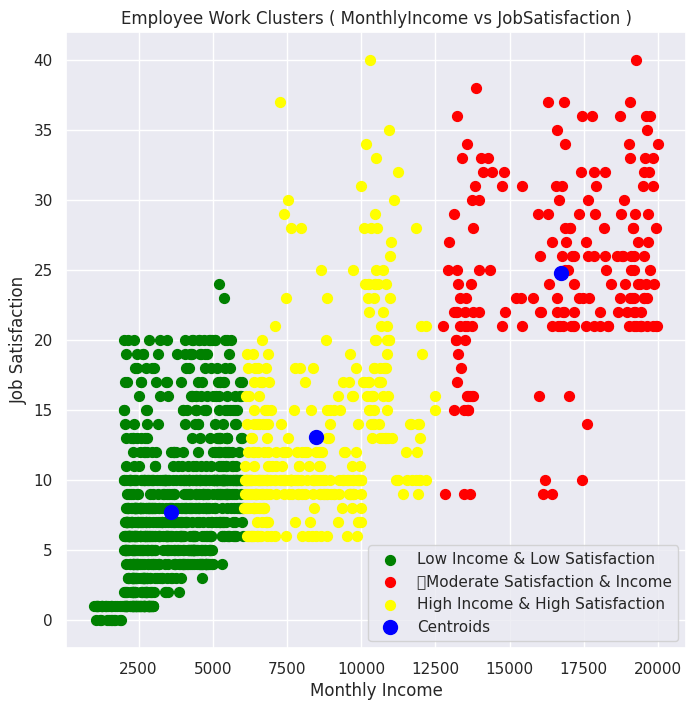

In [77]:
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 2], s=50, c='green', label='Low Income & Low Satisfaction')
plt.scatter(X[y == 1, 0], X[y == 1, 2], s=50, c='red', label='	Moderate Satisfaction & Income')
plt.scatter(X[y == 2, 0], X[y == 2, 2], s=50, c='yellow', label='High Income & High Satisfaction')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
            s=100, c='blue', label='Centroids')

plt.title('Employee Work Clusters ( MonthlyIncome vs JobSatisfaction )')
plt.ylabel('Job Satisfaction')
plt.xlabel('Monthly Income')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
print(HR.groupby('Cluster')[['JobSatisfaction',  'MonthlyIncome','TotalWorkingYears']].mean())

         JobSatisfaction  MonthlyIncome  TotalWorkingYears
Cluster                                                   
0               2.724891    3603.485808           7.758734
1               2.698413   16744.084656          24.783069
2               2.753425    8476.394521          13.123288
